In [2]:
#Importing Packages
import csv
import urllib2
import os
import pylab as pl
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline 

# IMPORTING THE FILE FOR SAT SCORES FOR 2012
SAT_Score = pd.read_csv("https://data.cityofnewyork.us/api/views/f9bf-2cp4/rows.csv?accessType=DOWNLOAD")


Populating the interactive namespace from numpy and matplotlib


In [3]:
SAT_Score.replace('s','NaN', inplace=True, regex=True)
SAT_Score = SAT_Score.dropna()

In [4]:
SAT_Score['District'] = SAT_Score['DBN'].map(lambda x: str(x)[:2])
SAT_Score['District'] = (SAT_Score['District']).astype(float)
SAT_Score['SAT_avg_reading'] = (SAT_Score['SAT Critical Reading Avg. Score']).astype(float)
SAT_Score['SAT_avg_writing'] = (SAT_Score['SAT Writing Avg. Score']).astype(float)
SAT_Score['SAT_avg_math'] = (SAT_Score['SAT Math Avg. Score']).astype(float)

SAT_Score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 477
Data columns (total 10 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             478 non-null object
SAT Critical Reading Avg. Score    478 non-null object
SAT Math Avg. Score                478 non-null object
SAT Writing Avg. Score             478 non-null object
District                           478 non-null float64
SAT_avg_reading                    421 non-null float64
SAT_avg_writing                    421 non-null float64
SAT_avg_math                       421 non-null float64
dtypes: float64(4), object(6)
memory usage: 41.1+ KB


In [5]:
SAT_Score = SAT_Score.groupby('District').mean()

In [6]:
SAT_Score = SAT_Score.reset_index()
SAT_Score = SAT_Score [0:32]

In [7]:
SAT_Score.head(3)

,District,SAT_avg_reading,SAT_avg_writing,SAT_avg_math
0,1,423.777778,413.555556,468.444444
1,2,424.068966,419.448276,441.344828
2,3,424.846154,417.076923,426.000000


In [8]:
SAT_Score['Total_Score'] = pd.DataFrame(SAT_Score['SAT_avg_reading'] + SAT_Score['SAT_avg_writing'] +
                                        SAT_Score['SAT_avg_math'])

In [9]:
SAT_Score.head(3)

,District,SAT_avg_reading,SAT_avg_writing,SAT_avg_math,Total_Score
0,1,423.777778,413.555556,468.444444,1305.777778
1,2,424.068966,419.448276,441.344828,1284.862069
2,3,424.846154,417.076923,426.000000,1267.923077


In [11]:
class_size = pd.read_csv('https://data.cityofnewyork.us/api/views/urz7-pzb3/rows.csv?accessType=DOWNLOAD')
class_size.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27611 entries, 0 to 27610
Data columns (total 16 columns):
CSD                                     27611 non-null int64
BOROUGH                                 27611 non-null object
SCHOOL CODE                             27611 non-null object
SCHOOL NAME                             27611 non-null object
GRADE                                   26127 non-null object
PROGRAM TYPE                            26127 non-null object
CORE SUBJECT (MS CORE and 9-12 ONLY)    26127 non-null object
CORE COURSE (MS CORE and 9-12 ONLY)     26127 non-null object
SERVICE CATEGORY(K-9* ONLY)             26127 non-null object
NUMBER OF STUDENTS / SEATS FILLED       26127 non-null float64
NUMBER OF SECTIONS                      26127 non-null float64
AVERAGE CLASS SIZE                      26127 non-null float64
SIZE OF SMALLEST CLASS                  26127 non-null float64
SIZE OF LARGEST CLASS                   26127 non-null float64
DATA SOURCE        

In [26]:
class_size['District'] = class_size['CSD']
classsize = class_size.groupby(['District','GRADE ','CORE SUBJECT (MS CORE and 9-12 ONLY)']).mean()

In [27]:
classsize_subject = classsize[(classsize.index.get_level_values('GRADE ') == 'MS Core') & 
              ((classsize.index.get_level_values('CORE SUBJECT (MS CORE and 9-12 ONLY)') == 'ENGLISH') |
                (classsize.index.get_level_values('CORE SUBJECT (MS CORE and 9-12 ONLY)') == 'MATH'))]
classsize_subject.head()

CSD  \
District GRADE   CORE SUBJECT (MS CORE and 9-12 ONLY)        
1        MS Core ENGLISH                                 1   
                 MATH                                    1   
2        MS Core ENGLISH                                 2   
                 MATH                                    2   
3        MS Core ENGLISH                                 3   

                                                       NUMBER OF STUDENTS / SEATS FILLED  \
District GRADE   CORE SUBJECT (MS CORE and 9-12 ONLY)                                      
1        MS Core ENGLISH                                                       69.647059   
                 MATH                                                          60.840000   
2        MS Core ENGLISH                                                      156.281250   
                 MATH                                                         154.361111   
3        MS Core ENGLISH                                                       96.625000   

                                                       NUMBER OF SECTIONS  \
District GRADE   CORE SUBJECT (MS CORE and 9-12 ONLY)                       
1        MS Core ENGLISH                                         2.941176   
                 MATH                                            2.760000   
2        MS Core ENGLISH                                         5.968750   
                 MATH                                            5.888889   
3        MS Core ENGLISH                                         4.031250   

                                                       AVERAGE CLASS SIZE  \
District GRADE   CORE SUBJECT (MS CORE and 9-12 ONLY)                       
1        MS Core ENGLISH                                        21.488235   
                 MATH                                           21.888000   
2        MS Core ENGLISH                                        23.375000   
                 MATH                                           24.427778   
3        MS Core ENGLISH                                        22.300000   

                                                       SIZE OF SMALLEST CLASS  \
District GRADE   CORE SUBJECT (MS CORE and 9-12 ONLY)                           
1        MS Core ENGLISH                                            19.588235   
                 MATH                                               19.800000   
2        MS Core ENGLISH                                            20.718750   
                 MATH                                               21.527778   
3        MS Core ENGLISH                                            19.968750   

                                                       SIZE OF LARGEST CLASS  \
District GRADE   CORE SUBJECT (MS CORE and 9-12 ONLY)                          
1        MS Core ENGLISH                                           23.176471   
                 MATH                                              23.480000   
2        MS Core ENGLISH                                           25.531250   
                 MATH                                              26.833333   
3        MS Core ENGLISH                                           24.375000   

                                                       SCHOOLWIDE PUPIL-TEACHER RATIO  
District GRADE   CORE SUBJECT (MS CORE and 9-12 ONLY)                                  
1        MS Core ENGLISH                                                          NaN  
                 MATH                                                             NaN  
2        MS Core ENGLISH                                                          NaN  
                 MATH                                                             NaN  
3        MS Core ENGLISH                                                          NaN

In [30]:
classsize_subject = class_size.groupby(['District']).mean()
classsize_subject = classsize_subject.reset_index()
classsize_subject.info()
classsize_subject.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 8 columns):
District                             32 non-null int64
CSD                                  32 non-null int64
NUMBER OF STUDENTS / SEATS FILLED    32 non-null float64
NUMBER OF SECTIONS                   32 non-null float64
AVERAGE CLASS SIZE                   32 non-null float64
SIZE OF SMALLEST CLASS               32 non-null float64
SIZE OF LARGEST CLASS                32 non-null float64
SCHOOLWIDE PUPIL-TEACHER RATIO       32 non-null float64
dtypes: float64(6), int64(2)
memory usage: 2.2 KB


,District,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,1,57.533719,2.672447,20.774759,19.042389,22.418112,12.319355
1,2,2,107.259830,4.220510,23.794368,20.898512,26.222104,14.770874
2,3,3,84.129252,3.417687,22.614150,20.481633,24.519728,13.810638


In [15]:
classsize_subject['District'] = classsize_subject['District'].astype(float)

In [31]:
SAT_vs_classsize = pd.merge(SAT_Score, classsize_subject, how='inner', on='District')
SAT_vs_classsize.columns
SAT_vs_classsize.info()
SAT_vs_classsize.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 12 columns):
District                             32 non-null float64
SAT_avg_reading                      32 non-null float64
SAT_avg_writing                      32 non-null float64
SAT_avg_math                         32 non-null float64
Total_Score                          32 non-null float64
CSD                                  32 non-null int64
NUMBER OF STUDENTS / SEATS FILLED    32 non-null float64
NUMBER OF SECTIONS                   32 non-null float64
AVERAGE CLASS SIZE                   32 non-null float64
SIZE OF SMALLEST CLASS               32 non-null float64
SIZE OF LARGEST CLASS                32 non-null float64
SCHOOLWIDE PUPIL-TEACHER RATIO       32 non-null float64
dtypes: float64(11), int64(1)
memory usage: 3.2 KB


,District,SAT_avg_reading,SAT_avg_writing,SAT_avg_math,Total_Score,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,423.777778,413.555556,468.444444,1305.777778,1,57.533719,2.672447,20.774759,19.042389,22.418112,12.319355
1,2,424.068966,419.448276,441.344828,1284.862069,2,107.259830,4.220510,23.794368,20.898512,26.222104,14.770874
2,3,424.846154,417.076923,426.000000,1267.923077,3,84.129252,3.417687,22.614150,20.481633,24.519728,13.810638
3,4,393.142857,392.714286,405.285714,1191.142857,4,65.478411,2.873921,21.646287,19.861831,23.233161,12.320588
4,5,407.333333,401.222222,409.666667,1218.222222,5,69.512059,3.066790,22.166048,20.189239,24.031540,12.722581


In [32]:
#Setting X and Y variables
cls_size = SAT_vs_classsize['AVERAGE CLASS SIZE']
tot_score = SAT_vs_classsize['Total_Score']

# Fitting linear regression model 
model_SAT_vs_classsize = smf.ols(formula='(tot_score) ~ (cls_size) ' , data= SAT_vs_classsize).fit()
print "R-squared value for Class Size vs Total Score:", model_SAT_vs_classsize.rsquared
print model_SAT_vs_classsize.params

# Using limit values for linspace function
lower1 = np.min(cls_size)
upper1 = np.max(cls_size)
print lower1 , upper1

# Generating predicted values using the above model1 parameters
x_dummy = pd.DataFrame({'cls_size': np.linspace(lower1, upper1, 100)})
predicted_model = model_SAT_vs_classsize.predict(x_dummy)

# Fitting a second degree curve linear regression model
model2_SAT_vs_classsize = smf.ols(formula='(tot_score) ~ (cls_size) + I(cls_size**2)', data= SAT_vs_classsize).fit()
print "R-squared value for Class Size vs Total Score:", model2_SAT_vs_classsize.rsquared
print model2_SAT_vs_classsize.params

# Generating predicted values using the above model2 parameters
x2_dummy = pd.DataFrame({'cls_atnd': np.linspace(lower1, upper1, 100)})
predicted2_model = model2_SAT_vs_classsize.predict(x_dummy)


R-squared value for Class Size vs Total Score: 0.432715672454
Intercept    34.558318
cls_size     51.710725
dtype: float64
20.363030303 24.5814338235
R-squared value for Class Size vs Total Score: 0.492042799645
Intercept           9279.888055
cls_size            -768.168435
I(cls_size ** 2)      18.130946
dtype: float64


(1050, 1400)

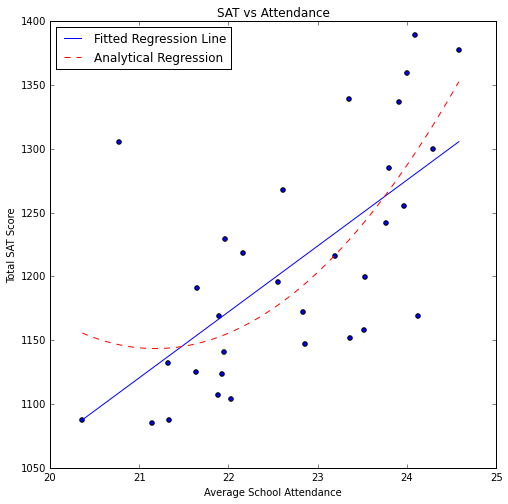

In [35]:
pl.figure(figsize=(8, 8))
pl.title('SAT vs Attendance')
pl.xlabel('Average School Attendance')
pl.ylabel('Total SAT Score')
pl.scatter(cls_size,tot_score)
pl.plot(x_dummy, predicted_model, 'b', label="Fitted Regression Line", linestyle='-')
pl.plot(x2_dummy,predicted2_model, 'r', linestyle='--', label = "Analytical Regression")
pl.legend(loc="upper left")
pl.xlim(int(lower1) , int(upper1+1))
pl.ylim(1050,1400)


